In [1]:
import os
import sys
import h5py
import glob
import time
import numpy as np
import pandas as pd
import pickle as pickle
import astropy.io.fits as pf
from astropy.time import Time
import matplotlib.pyplot as plt
from skyfield.api import load, wgs84, EarthSatellite

path = '/Users/Peter/Projects/starlink/'

from matplotlib.patches import Rectangle, Circle

%matplotlib inline

## Produce sky positions

Reduce passages file to selection pool:

 - P = all passages for target
 - X = selection pool (LSTSEQs with satnums)
 - Y = P reduced to LSTSEQs found in X and reduced such that each LSTSEQ has only the satnums found in X

In [3]:
# CORRECT

P = pd.read_pickle(f"{path}test_data/passages/passages_20221023LSC.p")
X = pd.read_pickle(f"{path}selection_pool/pool_LSC.p")

Y = {}
for lstseq, data in P.items():
    if lstseq in X:
        Y[lstseq] = {}
        for satnum in X[lstseq]:
            if satnum in data:
                Y[lstseq][satnum] = data[satnum]                    

In [4]:
list(X) == list(Y)

True

In [5]:
skypos = '/Users/Peter/Projects/master-thesis/SkyPositions/'
known = pd.read_pickle(f"{skypos}found_satellites_48506274.p")
pxlpos = pd.read_pickle(f"{skypos}pixel_positions_48506274.p")

In [6]:
testsat = list(known['negative'])[0]
data1, header1 = pf.getdata(f'{path}test_data/diff_images/LSC/diff_48506274LSC.fits.gz', header=True)

In [7]:
known['negative'][testsat]['vmag']

{'48506274': 5.6177109215243615}

In [8]:
pxlpos

{'negative': {'51797U': {'48506274': {'start': [1740, 1766],
    'end': [1602, 1942]}}},
 'positive': {}}

In [9]:
%matplotlib qt

img1 = '48506274'
data1 = pf.getdata(f'{path}test_data/diff_images/LSC/diff_{img1}LSC.fits.gz')

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=[10,6])
ax1.imshow(data1, vmin=-15, vmax=10)
ax1.axis('off')

for satnum in Y[img1]:

    center = Y[img1][satnum]['start']['x0'], Y[img1][satnum]['start']['y0']
    c = Circle(center, radius=30, fill=False, color='r')
    ax1.add_patch(c)

    center = Y[img1][satnum]['end']['x0'], Y[img1][satnum]['end']['y0']
    c = Circle(center, radius=30, fill=False, color='r')
    ax1.add_patch(c)
    
x = pxlpos['negative'][testsat][img1]['start'][0]
y = pxlpos['negative'][testsat][img1]['start'][1]

c = Circle((x,y), radius=30, fill=False, color='w')
ax1.add_patch(c)
    
plt.show()

In [9]:
# line_id in readdata.cleanedlines
# look at number of lines found by the Hough Transform in the print statements
# plot the lines

In [11]:
#### OKAY... not a matter of including second image positions

# new_passages = pd.read_pickle('/Users/Peter/Projects/master-thesis/passages/new_passages_20221023LSC.p')
# new_passages[img1][testsat]

In [10]:
Y[img1][testsat]

{'start': {'jd': 2459876.5170096178,
  'lst': 21.852051053866504,
  'ra': 336.49531070713215,
  'dec': -40.47250924460064,
  'x0': 1736.4853886026976,
  'y0': 1772.4138003692353},
 'end': {'jd': 2459876.517083494,
  'lst': 21.85382408864436,
  'ra': 341.0633147704432,
  'dec': -43.53074896323729,
  'x0': 1596.5854911529516,
  'y0': 1950.8216368996955},
 'JD': 2459876.517046556}

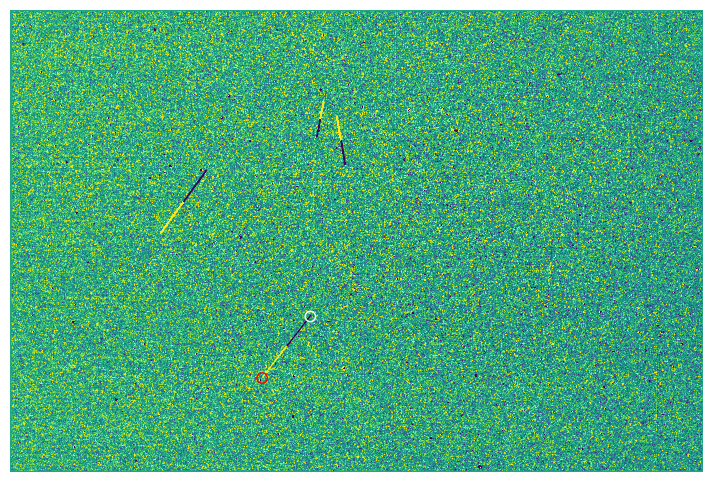

In [12]:
%matplotlib inline

img1 = '48506274'
img2 = '48506275'

data1 = pf.getdata(f'{path}test_data/diff_images/LSC/diff_{img1}LSC.fits.gz')

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=[10,6])
ax1.imshow(data1, vmin=-15, vmax=10)
ax1.axis('off')

center = Y[img1][testsat]['start']['x0'], Y[img1][testsat]['start']['y0']
c = Circle(center, radius=30, fill=False, color='w')
ax1.add_patch(c)

center = Y[img2][testsat]['end']['x0'], Y[img2][testsat]['end']['y0']
c = Circle(center, radius=30, fill=False, color='r')
ax1.add_patch(c)
 
plt.show()

In [11]:
new_passages = pd.read_pickle('/Users/Peter/Projects/master-thesis/new_passages/new_passages_20221023LSC.p')

In [20]:
# SWEEET

%matplotlib qt

img1 = '48506274'

data1 = pf.getdata(f'{path}test_data/diff_images/LSC/diff_{img1}LSC.fits.gz')

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=[10,6])
ax1.imshow(data1, vmin=-15, vmax=10)
ax1.axis('off')

center = new_passages[img1][testsat]['start']['x'], new_passages[img1][testsat]['start']['y']
c = Circle(center, radius=30, fill=False, color='w')
ax1.add_patch(c)

center = new_passages[img1][testsat]['end']['x'], new_passages[img1][testsat]['end']['y']
c = Circle(center, radius=30, fill=False, color='r')
ax1.add_patch(c)
 
plt.show()

In [19]:
new_passages[img1][testsat]

{'start': {'jd': 2459876.5170096178,
  'lst': 21.852051053866504,
  'ra': 336.49531070713215,
  'dec': -40.47250924460064,
  'x': 1736.4853886026976,
  'y': 1772.4138003692353},
 'end': {'jd': 2459876.5171573707,
  'lst': 21.855597123422214,
  'ra': 345.87602449899043,
  'dec': -46.271994853927254,
  'x': 1457.7467346869855,
  'y': 2127.96139163411},
 'JD': 2459876.517046556}

In [47]:
vmags = pd.read_pickle('/Users/Peter/Projects/master-thesis/vmags/vmags_20221023LSC.p')

In [48]:
known['negative']['51797U']['vmag']

{'48506274': 5.6177109215243615}

In [58]:
vmags[img1]

{'48369U': {'positive': {'start': {'x': 980.2879591615763,
    'y': 1139.757942159247},
   'end': {'x': 846.5724573003736, 'y': 1323.3833256680014},
   'vmag': 7.253984411592402},
  'negative': {'start': {'x': 1114.8644184908665, 'y': 954.8471260231179},
   'end': {'x': 980.2879591615763, 'y': 1139.757942159247},
   'vmag': 8.99068663127661}},
 '51797U': {'positive': {'start': {'x': 1596.5854911529516,
    'y': 1950.8216368996955},
   'end': {'x': 1457.7467346869855, 'y': 2127.96139163411},
   'vmag': 7.72622178189544},
  'negative': {'start': {'x': 1736.4853886026976, 'y': 1772.4138003692353},
   'end': {'x': 1596.5854911529516, 'y': 1950.8216368996955},
   'vmag': 8.198823991961556}}}

In [57]:

%matplotlib qt

img1 = '48506274'

data1 = pf.getdata(f'{path}test_data/diff_images/LSC/diff_{img1}LSC.fits.gz')

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=[10,6])
ax1.imshow(data1, vmin=-15, vmax=10)
ax1.axis('off')


# center = new_passages[img1][testsat]['start']['x'], new_passages[img1][testsat]['start']['y']
# c = Circle(center, radius=30, fill=False, color='r')
# ax1.add_patch(c)

# center = new_passages[img1][testsat]['end']['x'], new_passages[img1][testsat]['end']['y']
# c = Circle(center, radius=30, fill=False, color='r')
# ax1.add_patch(c)


center = vmags[img1][testsat]['positive']['end']['x'], vmags[img1][testsat]['positive']['end']['y']
c = Circle(center, radius=30, fill=False, color='r')
ax1.add_patch(c)

center = vmags[img1][testsat]['negative']['start']['x'], vmags[img1][testsat]['negative']['start']['y']
c = Circle(center, radius=30, fill=False, color='w')
ax1.add_patch(c)
 
    
plt.show()

In [ ]:
# Maybe do negative and positive separately

### Start, mid, end

In [2]:
new_passages = pd.read_pickle('/Users/Peter/Projects/master-thesis/new_passages/new_passages_20221023LSC.p')

In [46]:
%matplotlib qt

img1 = '48506274'

data1 = pf.getdata(f'{path}test_data/diff_images/LSC/diff_{img1}LSC.fits.gz')

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=[10,6])
ax1.imshow(data1, vmin=-15, vmax=10)
ax1.axis('off')


center = new_passages[img1][testsat]['start']['x'], new_passages[img1][testsat]['start']['y']
c = Circle(center, radius=30, fill=False, color='r')
ax1.add_patch(c)

center = new_passages[img1][testsat]['mid']['x'], new_passages[img1][testsat]['mid']['y']
c = Circle(center, radius=30, fill=False, color='r')
ax1.add_patch(c)


center = new_passages[img1][testsat]['end']['x'], new_passages[img1][testsat]['end']['y']
c = Circle(center, radius=30, fill=False, color='r')
ax1.add_patch(c)
 
    
plt.show()

In [13]:
x_min = new_passages[img1][testsat]['start']['x']
x_max = new_passages[img1][testsat]['end']['x']

y_min = new_passages[img1][testsat]['start']['y']
y_max = new_passages[img1][testsat]['end']['y']

data1 = pf.getdata(f'{path}test_data/diff_images/LSC/diff_{img1}LSC.fits.gz')

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=[10,6])
ax1.imshow(data1, vmin=-15, vmax=10)
ax1.axis('off')

c = Circle((x_min, y_min), radius=30, fill=False, color='r')
ax1.add_patch(c)

c = Circle((x_max, y_max), radius=30, fill=False, color='w')
ax1.add_patch(c)

    
plt.show()

### Vmag calculation

In [ ]:
import scipy.ndimage as scn
from sklearn import linear_model
from scipy.optimize import curve_fit

In [14]:
# Length of the line segment
n_pixels = int(round(np.sqrt((x_max - x_min)**2.+ (y_max - y_min)**2.)))

# Assuming the line segment is linear
x_values = np.rint(np.linspace(x_min, x_max, n_pixels)).astype(int)
y_values = np.rint(np.linspace(y_min, y_max, n_pixels)).astype(int)

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=[10,6])
ax1.imshow(data1, vmin=-15, vmax=10)
ax1.plot(x_values, y_values)
ax1.axis('off')   
plt.show()

# LINE PLOTTING IS CORRECT

emptymask = np.zeros((data1.shape[0], data1.shape[1]))
linemask = emptymask.copy()
linemask[y_values, x_values]=1

In [22]:
import scipy.ndimage as scn # NOTE: scn.filters.convolve was changed to scn.convolve due to deprecation warning!

# The inner_skymask is used to 'cut a hole' in the outer_skymask, such that we can select a donutshaped patch of 
# the sky to determine the typical background pixel value

# Broaden the line segment by 6.5 pixels in each direction
inner_skymask = scn.convolve(linemask,np.ones((11,11)))
inner_skymask[np.where(inner_skymask >= 1)] = 1

# Broaden the line segment by 21 pixels in each direction
outer_skymask = scn.convolve(linemask,np.ones((41,41)))
outer_skymask[np.where(inner_skymask == 1)] = 0
outer_skymask[np.where(outer_skymask >= 1)] = 1

# To determine the satellite flux, we broaden the line segment by 4 pixels in each direction
sat_mask = scn.convolve(linemask,np.ones((8,8)))
sat_mask[np.where(sat_mask >= 1)] = 1

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=[10,6])
ax1.imshow(inner_skymask)
ax2.imshow(outer_skymask)
ax3.imshow(sat_mask)
for ax in [ax1,ax2,ax3]:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [34]:
# We select surrounding stars that lie within circle with r=2*line length of center of the line segment (a,b)
a,b = int(round((x_min+x_max)/2.)), int(round((y_min+y_max)/2.))
yy, xx = np.meshgrid(np.linspace(
    0, emptymask.shape[0]-1, emptymask.shape[0]), np.linspace(0, emptymask.shape[1]-1, emptymask.shape[1]))

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=[10,6])
ax1.imshow(data1, vmin=-15, vmax=10)
ax1.axis('off')

c = Circle((a, b), radius=30, fill=False, color='r')
ax1.add_patch(c)
    
plt.show()

In [69]:
diffimage_passages = pd.read_pickle('../diffimage_passages/diffimage_passages_20221023LSC.p')

In [70]:
print(diffimage_passages[img1][testsat]['negative']['lstseq'])
print(diffimage_passages[img1][testsat]['positive']['lstseq'])

48506274
48506275


In [71]:
fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=[10,6])
ax1.imshow(data1, vmin=-15, vmax=10)
ax1.axis('off')


center = diffimage_passages[img1][testsat]['negative']['start']['x'], diffimage_passages[img1][testsat]['negative']['start']['y']
c = Circle(center, radius=30, fill=False, color='r')
ax1.add_patch(c)

center = diffimage_passages[img1][testsat]['negative']['end']['x'], diffimage_passages[img1][testsat]['negative']['end']['y']
c = Circle(center, radius=30, fill=False, color='r')
# ax1.add_patch(c)

center = diffimage_passages[img1][testsat]['positive']['start']['x'], diffimage_passages[img1][testsat]['positive']['start']['y']
c = Circle(center, radius=30, fill=False, color='w')
# ax1.add_patch(c)

center = diffimage_passages[img1][testsat]['positive']['end']['x'], diffimage_passages[img1][testsat]['positive']['end']['y']
c = Circle(center, radius=30, fill=False, color='w')
ax1.add_patch(c)
 
    
plt.show()

In [80]:
vmags = pd.read_pickle('../vmags/vmags_20221023LSC.p')
vmags_v3 = pd.read_pickle('../vmags_v3/vmags_20221023LSC.p')

### NOTE: including the LSTSEQ for the second image did not change how the Vmag was calculated:

In [90]:
# Using same LSTSEQ
satnum = '51797U'
vmags[img1][satnum]['negative']['vmag']

8.198823991961556

In [89]:
# Using both LSTSEQs (changed passages to do this)
vmags_v3[img1][satnum]['negative']['vmag']

8.198823991961556

### Perhaps I should go back to full segment and just use those values! ...but why different to original...?

In [91]:
known['negative'][satnum]['vmag'][img1]

5.6177109215243615